In [1]:
#import the packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
data = pd.read_csv("assignment 2/Assignment2_2023_data.txt",header=None,sep=",")
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1


In [4]:
# Step 2: Assign column names to the dataset
data.columns = [
    'Subject id', 'Jitter (local)', 'Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)',
    'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)',
    'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch',
    'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods',
    'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames',
    'Number of voice breaks', 'Degree of voice breaks', 'UPDRS score', 'class information'
]

data.head()

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS score,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [5]:
# Step 2: Define the independent variable columns
#independent_variables = ['Jitter (local)', 'Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)',
                         #'Shimmer (local)', 'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)',
                         #'Shimmer (dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation',
                         #'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period',
                         #'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks',
                         #'Degree of voice breaks']

# Step 4: Define the target variable (y)
y = data['UPDRS score']

# Step 5: Define the ind variable (x)
X = data.loc[:,'Jitter (local)': 'Degree of voice breaks'].astype('float64')

# Print the first few rows of X and y
print(X.head(3))
print(y.head(3))

   Jitter (local)  Jitter (local, absolute)  Jitter (rap)  Jitter (ppq5)  \
0           1.488                  0.000090         0.900          0.794   
1           0.728                  0.000038         0.353          0.376   
2           1.220                  0.000074         0.732          0.670   

   Jitter (ddp)  Shimmer (local)  Shimmer (local, dB)  Shimmer (apq3)  \
0         2.699            8.334                0.779           4.517   
1         1.059            5.864                0.642           2.058   
2         2.196            8.719                0.875           4.347   

   Shimmer (apq5)  Shimmer (apq11)  ...  Standard deviation  Minimum pitch  \
0           4.609            6.802  ...              10.421        142.229   
1           3.180            7.194  ...              14.773        159.515   
2           5.166            7.548  ...              12.981        146.445   

   Maximum pitch  Number of pulses  Number of periods  Mean period  \
0        187.576   

In [6]:
#spliting the data to train and test data

from sklearn.model_selection import train_test_split

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
np.random.seed(seed=12)

#training data for the purpose of training
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train) #full set data

In [8]:
#define the model

def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

# USING VALIDATION SET APPROACH

### FORWARD 

In [9]:
#USING VALIDATION TO GET THE BEST MODEL (ONLY ONE)
#function on the training set in order to perform forward selection for all model sizes:

def forward(predictors, X_train, y_train, X_test, y_test):
    
    results = []

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model

In [11]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []
 
for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train], X[test], y[test])
    predictors = models_train.loc[i]["model"].model.exog_names

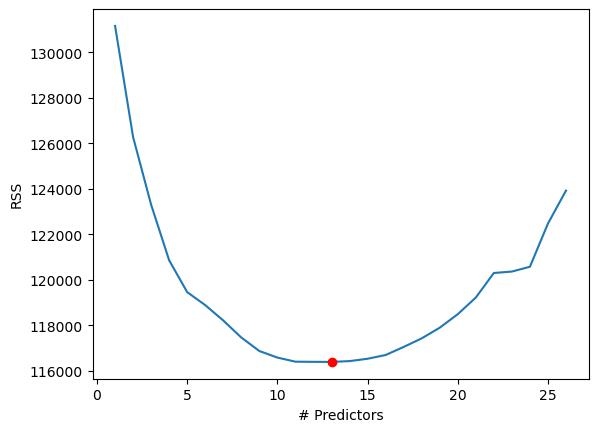

In [12]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(pd.to_numeric(models_train["RSS"]).argmin()+1, models_train["RSS"].min(), "or");

In [16]:
print(models_train.loc[13, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.471
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                              34.15
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                    1.12e-60
Time:                        10:01:06   Log-Likelihood:                         -2112.4
No. Observations:                 511   AIC:                                      4251.
Df Residuals:                     498   BIC:                                      4306.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

Text(0, 0.5, 'BIC')

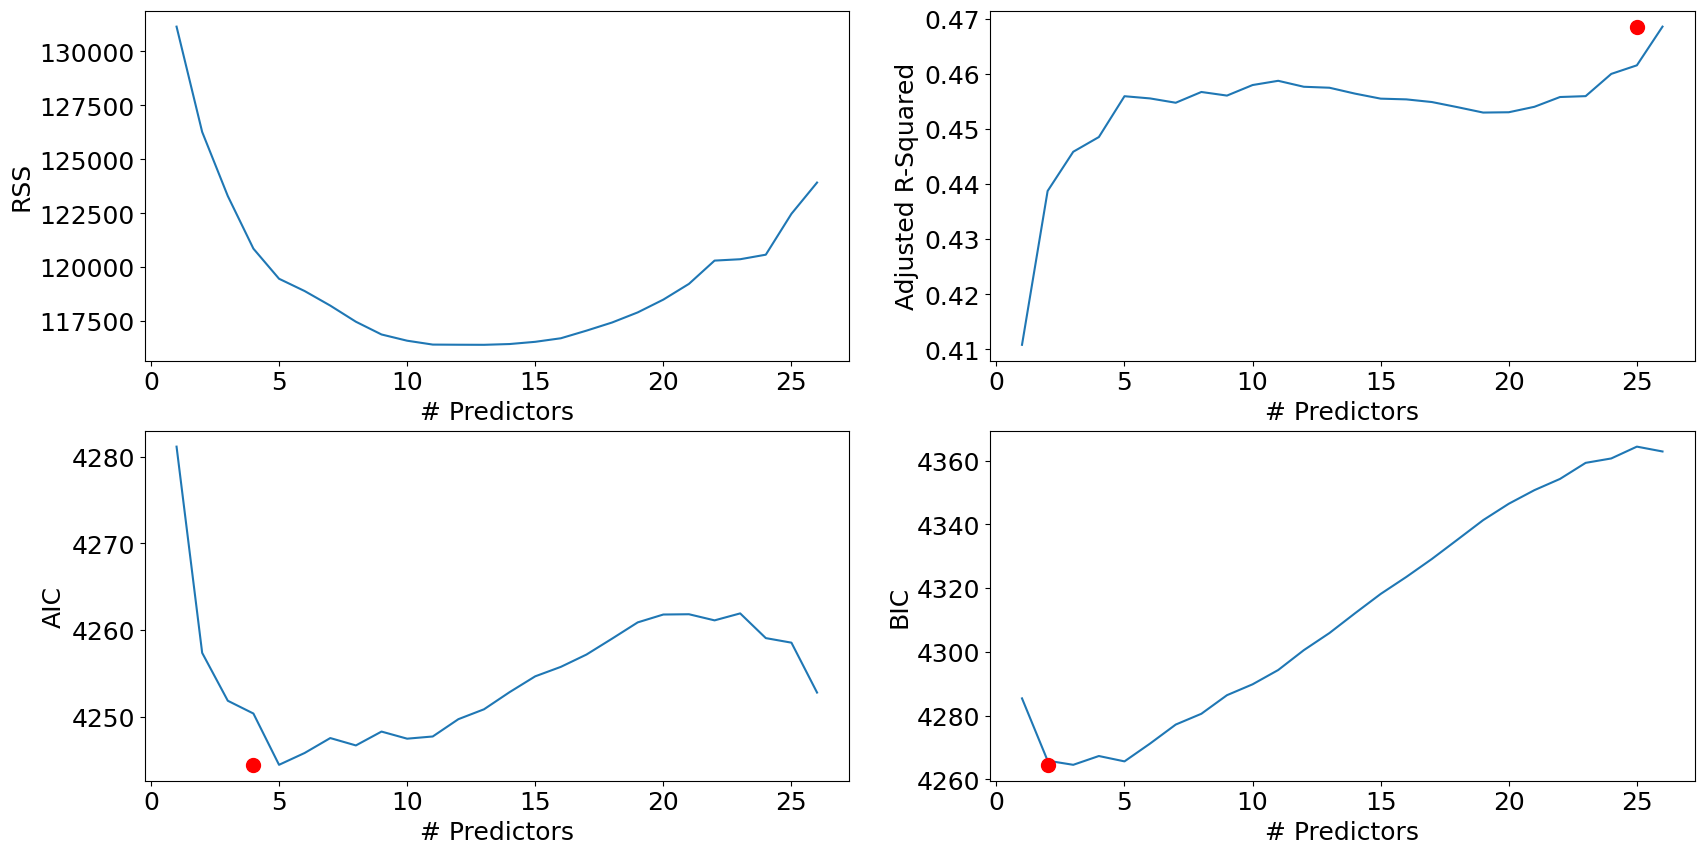

In [18]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_train.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Adjusted R-Squared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_train.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')


# TESTING MODEL

In [13]:
models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,15):    
    models_test.loc[i] = forward(predictors, X[test], y[test], X[test], y[test])
    predictors = models_test.loc[i]["model"].model.exog_names

# FULL MODEL

In [10]:
#test in the full model to get the best model and compare with the train data

models_full = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,15):    
    models_full.loc[i] = forward(predictors, X, data['UPDRS score'], X, data['UPDRS score'])
    predictors = models_full.loc[i]["model"].model.exog_names

- We find that the best model (according to the validation set approach) is the one that contains 13 predictors.
- next, to perform best subset selection on the full dataset and select the best 13-predictors model.
- We perform this selection on the full data set and select the best 13-predictor model, rather than simply using the predictors that we obtained from the training set, because the best 13-predictor model on the full data set may differ from the corresponding model on the training set.

In fact, we see that the best 13-variable model on the full data set has a different set of predictors than the best 13-variable model on the training set:

In [14]:
print(models_train.loc[13, "model"].model.exog_names)
print(models_test.loc[13, "model"].model.exog_names) #test on full model

#result will be different between train and test data 

['Shimmer (apq11)', 'HTN', 'Jitter (local, absolute)', 'NTH', 'Jitter (rap)', 'Shimmer (local, dB)', 'Degree of voice breaks', 'Number of periods', 'Fraction of locally unvoiced frames', 'Number of pulses', 'Shimmer (dda)', 'AC', 'Median pitch']
['Shimmer (apq11)', 'HTN', 'Jitter (local, absolute)', 'Degree of voice breaks', 'NTH', 'Jitter (rap)', 'Shimmer (local, dB)', 'Number of periods', 'Fraction of locally unvoiced frames', 'Shimmer (apq3)', 'Shimmer (local)', 'Number of voice breaks', 'Jitter (ppq5)']


In [15]:
#result will be different full data set

print(models_full.loc[13, "model"].model.exog_names)

['Shimmer (apq11)', 'HTN', 'Jitter (local, absolute)', 'Standard deviation of period', 'NTH', 'Jitter (ddp)', 'Number of periods', 'Number of pulses', 'Shimmer (local, dB)', 'Degree of voice breaks', 'Fraction of locally unvoiced frames', 'Shimmer (apq3)', 'Standard deviation']


In [35]:
models_train

,RSS,model
1,131151.778631,<statsmodels.regression.linear_model.Regressio...
2,126268.815874,<statsmodels.regression.linear_model.Regressio...
3,123298.119762,<statsmodels.regression.linear_model.Regressio...
4,120857.70734,<statsmodels.regression.linear_model.Regressio...
5,119462.441125,<statsmodels.regression.linear_model.Regressio...
6,118891.988475,<statsmodels.regression.linear_model.Regressio...
7,118217.167977,<statsmodels.regression.linear_model.Regressio...
8,117469.598595,<statsmodels.regression.linear_model.Regressio...
9,116878.460013,<statsmodels.regression.linear_model.Regressio...
10,116589.791119,<statsmodels.regression.linear_model.Regressio...


In [32]:
models_full

,RSS,model
1,260758.789264,<statsmodels.regression.linear_model.Regressio...
2,249471.003458,<statsmodels.regression.linear_model.Regressio...
3,244618.234621,<statsmodels.regression.linear_model.Regressio...
4,241084.831313,<statsmodels.regression.linear_model.Regressio...
5,239126.841679,<statsmodels.regression.linear_model.Regressio...
6,236676.501014,<statsmodels.regression.linear_model.Regressio...
7,235513.038237,<statsmodels.regression.linear_model.Regressio...
8,234329.806654,<statsmodels.regression.linear_model.Regressio...
9,233325.447096,<statsmodels.regression.linear_model.Regressio...
10,232827.756821,<statsmodels.regression.linear_model.Regressio...


In [19]:
print(models_full.loc[13, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              70.90
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                   6.90e-133
Time:                        10:01:07   Log-Likelihood:                         -4285.3
No. Observations:                1040   AIC:                                      8597.
Df Residuals:                    1027   BIC:                                      8661.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

Text(0, 0.5, 'BIC')

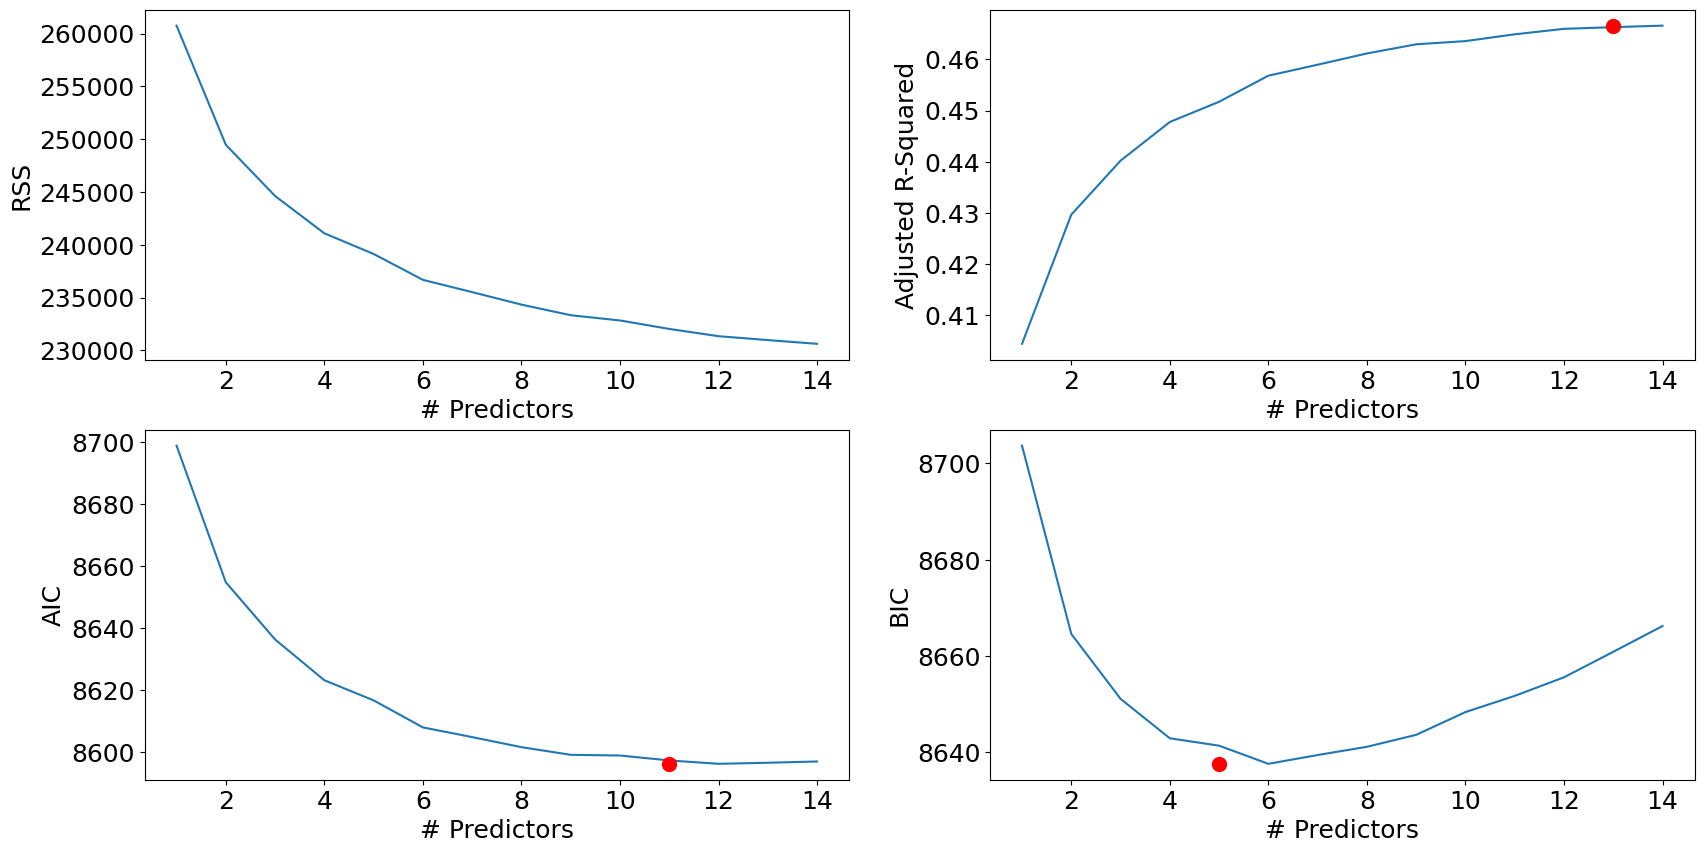

In [20]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_full["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_full.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Adjusted R-Squared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_full.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_full.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')


# CROSS VALIDATION 
##choose this!

- cross-validation is to divide the available dataset into two or more subsets: a training set and a validation (or testing) set.
-Common choices for the value of K are 5 or 10, but it can vary depending on the size of the dataset and computational resources available.

In [21]:
k = 10        # number of folds
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(y), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,20))
cv_errors = cv_errors.fillna(0)

In [22]:
models_cv = pd.DataFrame(columns=["RSS", "model"])
    
# Outer loop iterates over all folds
for j in range(1,k+1):

    # Reset predictors
    predictors = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold
        #each folds we 
        models_cv.loc[i] = forward(predictors, X[folds != (j-1)], y[folds != (j-1)], X[folds == (j-1)], y[folds == (j-1)])
        
        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors
        predictors = models_cv.loc[i]["model"].model.exog_names
        

C:\Users\NUR MARDHIAH\AppData\Local\Temp\ipykernel_6784\1806758217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\NUR MARDHIAH\AppData\Local\Temp\ipykernel_6784\1806758217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\NUR MARDHIAH\AppData\Local\Temp\ipykernel_6784\1806758217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [23]:
cv_errors #the lower the cv the better the model's generalization performance

,1,2,3,4,5,6,7,8,9,10
1,28757.735295,22822.479509,24275.391993,22576.846660,22000.786865,27874.175494,29377.500985,23757.657695,24249.337581,25398.185102
2,27790.095753,21881.426211,22769.277346,22014.539939,21596.091815,26854.681290,28235.140087,23284.784184,23756.197261,23679.242444
3,27110.765216,21204.957364,22564.782671,21313.212235,20826.570580,25792.273289,27059.443899,21765.546382,23482.091985,23230.352319
4,26927.428459,20973.631721,22348.503958,21226.666848,19881.564044,25235.024700,26562.586222,20901.574491,23414.026688,23205.306009
5,26718.985650,20807.561020,22021.712600,21094.553972,19598.918626,24318.125440,26097.502470,20511.667012,23416.502587,23183.435194
6,26595.980875,20621.144446,21848.187178,21045.495579,19498.969318,23358.127786,25569.571048,20477.556210,23406.653052,23168.814614
7,26577.178351,20388.825148,21703.922271,21043.215445,19510.377594,23376.521353,25308.095694,20433.889005,23492.966004,22958.519519
8,26560.127438,20284.046530,21363.773876,21061.479570,19569.502905,23416.620483,25207.109661,20404.467819,23498.123301,22037.193570
9,26482.429600,20208.556790,21296.005722,20845.966698,19646.230425,23462.400205,25102.520214,20389.329922,23533.144127,21854.071897
10,26290.791983,20171.884262,21220.747734,20871.824928,19720.900439,23426.719082,25037.612135,20382.185746,23300.222395,21726.920623


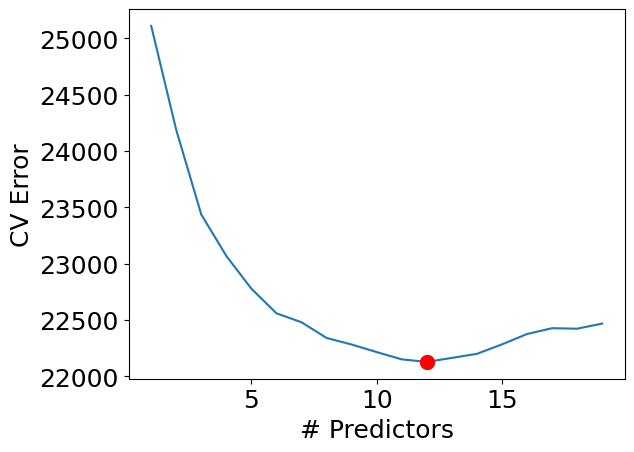

In [24]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin()+1, cv_mean.min(), "or");


#12 preditors model is the best 

In [25]:
print(models_cv.loc[12, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.452
Model:                            OLS   Adj. R-squared (uncentered):              0.445
Method:                 Least Squares   F-statistic:                              63.67
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                   4.02e-112
Time:                        10:01:18   Log-Likelihood:                         -3876.3
No. Observations:                 937   AIC:                                      7777.
Df Residuals:                     925   BIC:                                      7835.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [40]:
models_cv

,RSS,model
1,25398.185102,<statsmodels.regression.linear_model.Regressio...
2,23679.242444,<statsmodels.regression.linear_model.Regressio...
3,23230.352319,<statsmodels.regression.linear_model.Regressio...
4,23205.306009,<statsmodels.regression.linear_model.Regressio...
5,23183.435194,<statsmodels.regression.linear_model.Regressio...
6,23168.814614,<statsmodels.regression.linear_model.Regressio...
7,22958.519519,<statsmodels.regression.linear_model.Regressio...
8,22037.19357,<statsmodels.regression.linear_model.Regressio...
9,21854.071897,<statsmodels.regression.linear_model.Regressio...
10,21726.920623,<statsmodels.regression.linear_model.Regressio...


We see that cross-validation selects a 12-predictor model. Now let's go back to our results on the full data set in order to obtain the 12-predictor model.

Text(0, 0.5, 'BIC')

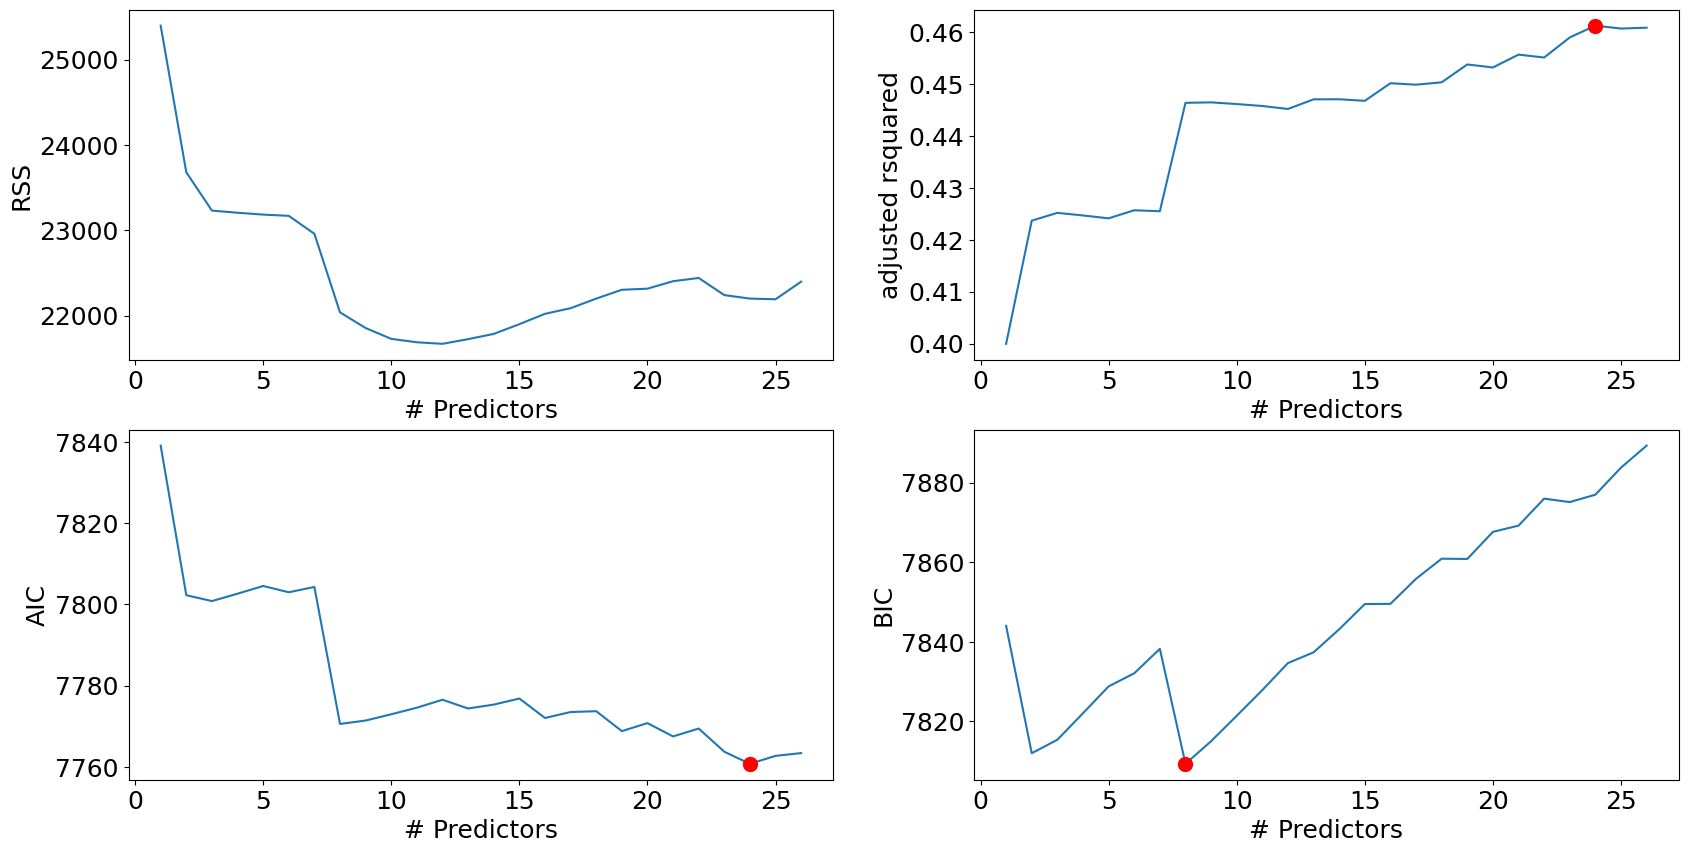

In [26]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_cv.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_cv.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

#model with 24 predictor is the best for adjusted r2, highest
#model with 24 predictor is the best due AIC is the lowest 
#model with 9 predictor is the best due BIC is the lowest 
#model with 12 predictor is the best due RSS is the lowest 

In [27]:
print(models_cv.loc[12, "model"].model.exog_names)

['Shimmer (apq11)', 'HTN', 'Degree of voice breaks', 'Number of voice breaks', 'Shimmer (apq5)', 'Shimmer (local, dB)', 'NTH', 'Jitter (ddp)', 'Shimmer (apq3)', 'Shimmer (dda)', 'Jitter (rap)', 'Shimmer (local)']


In [36]:
print(models_full.loc[12, "model"].model.exog_names)

['Shimmer (apq11)', 'HTN', 'Jitter (local, absolute)', 'Standard deviation of period', 'NTH', 'Jitter (ddp)', 'Number of periods', 'Number of pulses', 'Shimmer (local, dB)', 'Degree of voice breaks', 'Fraction of locally unvoiced frames', 'Shimmer (apq3)']


In [28]:
#full model

print(models_full.loc[12, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              76.62
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                   1.73e-133
Time:                        10:01:19   Log-Likelihood:                         -4286.1
No. Observations:                1040   AIC:                                      8596.
Df Residuals:                    1028   BIC:                                      8656.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

Text(0, 0.5, 'BIC')

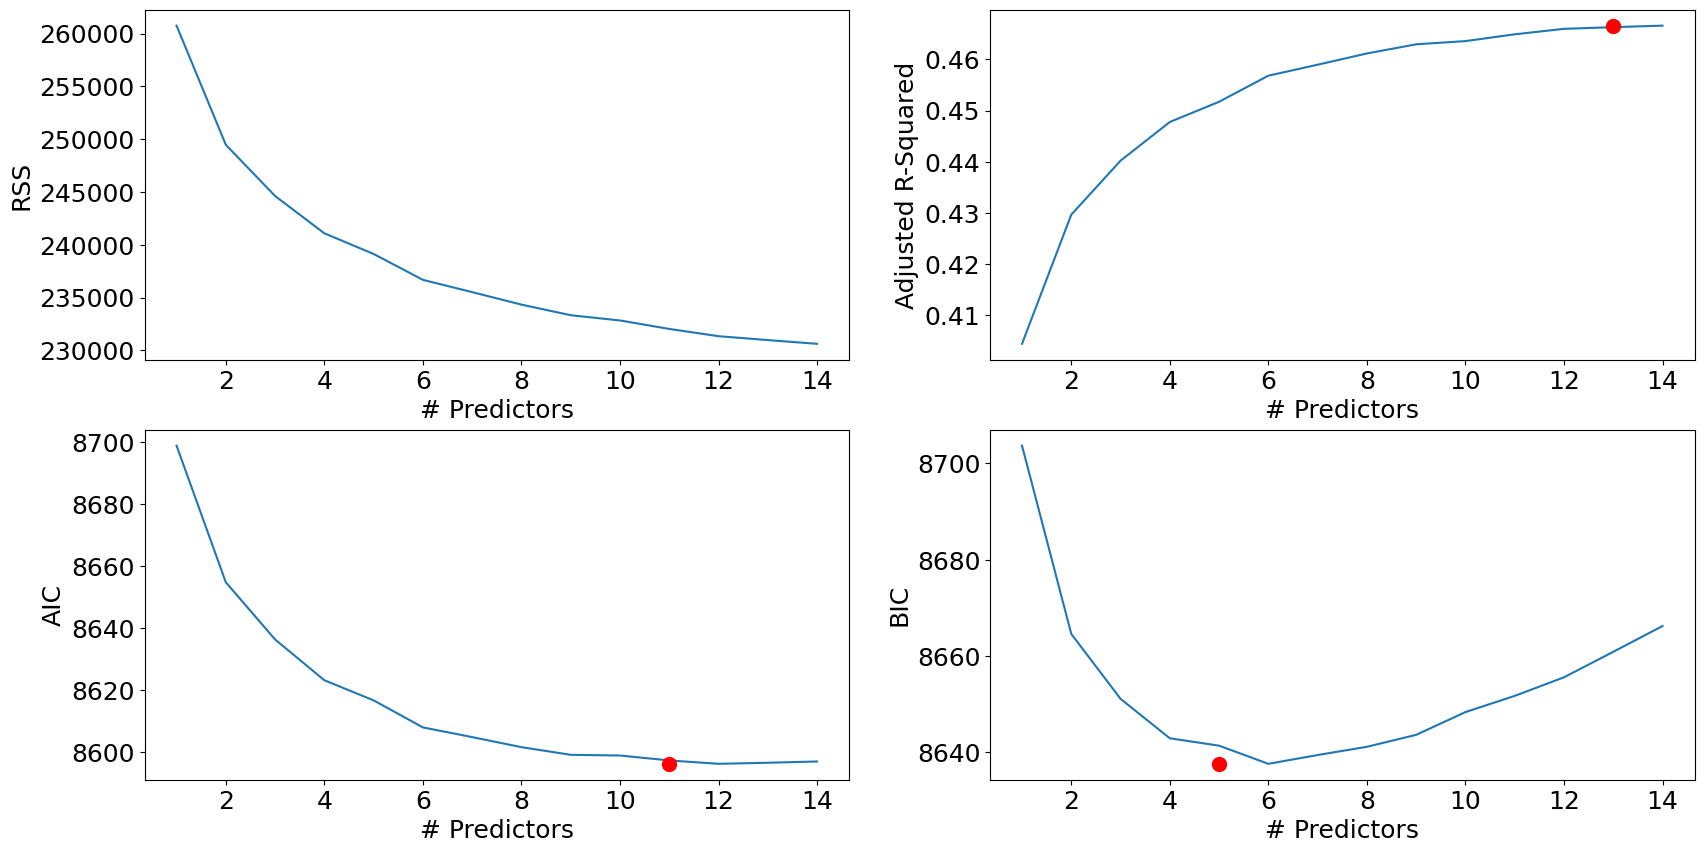

In [29]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_full["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_full.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Adjusted R-Squared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_full.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_full.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')
